# CM3070 Final Year Project
   A Final year project End-Term assignment By Devansh Gupta

In [13]:
import pandas as pd
import numpy as np
import time 
import datetime
import mplfinance as mpf
# import
# Make sure that you have all these libaries available to run the code successfully
# from pandas_datareader import data
import matplotlib.pyplot as plt
import datetime as dt
import urllib.request, json
import os
# import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

from requests_html import HTMLSession

## Load Data

Load all updated financial data to be used from a CSV URL provided by https://finance.yahoo.com/ via web scraping. The website is reliable and provides free data available for download. Other websites do not provide all collumns of data which makes it hard to plot the candles on the chart for visualization. A URL is formatted to include the date range of the data, and the stock code itself. It will then read the URL which has a CSV with the appropriate data embedded in it. Data is from January 2021 to present day.

In [14]:
def loading_data(ticker):
    
    #defining date range and intervals of data using library datetime
    start_period = int(time.mktime(datetime.datetime(2022,6,1,23,59).timetuple()))
    end_period = int(time.mktime(datetime.datetime.now().timetuple()))
    interval = '1d'
    #modifying URL
    url = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={start_period}&period2={end_period}&interval={interval}&events=history&includeAdjustedClose=true'
    
    #getting URL functional status/checking for 404 using library requests_html 
    session = HTMLSession()
    r = str(session.get(url))
    
    #checking if the URL works
    if r == '<Response [200]>':  
        df = pd.read_csv(url)
        print('Data taken from Yahoo website.')
    else:
        df = pd.read_csv(ticker + '_data.csv')
        print('Data taken from local CSV files since yahoo servers are down.')
    
    # cleaning the code
    df.dropna(inplace=True)
    df = df[(df['Close'] > 0) & (df['Open'] > 0) & (df['High'] > 0) & (df['Low'] > 0)]
    
    #adding moving averages
    df.Date = pd.to_datetime(df.Date)
    df = df.set_index(df.Date)
    df['MA10'] = df['Close'].rolling(window=10).mean()
    df['MA20'] = df['Close'].rolling(window=20).mean()
    ma =  df['Close'].rolling(window=20).mean()
    df['UppBolBand'] = ma + 2*(df['Close'].rolling(window=20).std())
    df['LowBolBand'] = ma - 2*(df['Close'].rolling(window=20).std())
    
    return df

Data taken from Yahoo website.


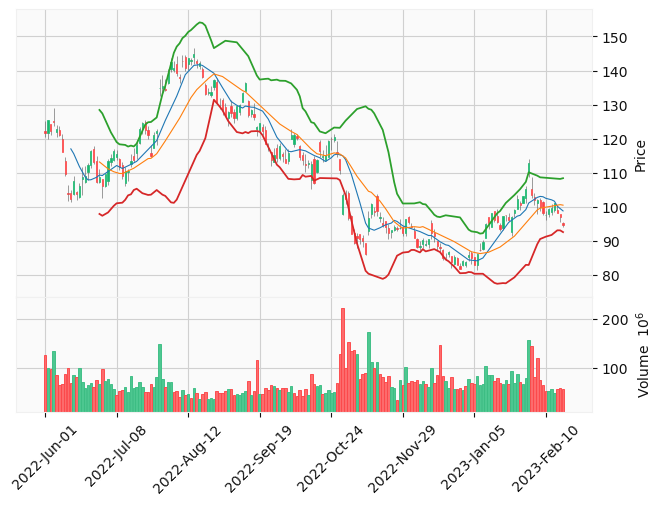

In [15]:
data = (loading_data("AMZN"))

apUpp = mpf.make_addplot(data[['UppBolBand',"LowBolBand"]])
mpf.plot(data,type = 'candle',style = 'yahoo',mav = (10,20), volume = True, addplot = apUpp)

## Feature Selection

In order to get the best results, the correct features have to be calculated and inserted into the LSTM model. This has to be done dynamically since stock data is so volatile and unpredictable that even though many technical indicators are avaiable on the internet, most likely they only cater to a small minority of stocks or even only certain scenarios.